In [44]:
  # Importing necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
data=pd.read_excel("/content/employee_burnout_analysis-AI 2.xlsx")

In [4]:
data.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3,7.0,6.9,0.52


In [5]:
data.tail()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
22745,fffe31003500370039003100,2008-12-30,Female,Service,No,1,3.0,NaN,0.41
22746,fffe33003000350031003800,2008-01-19,Female,Product,Yes,3,6.0,6.7,0.59
22747,fffe390032003000,2008-11-05,Male,Service,Yes,3,7.0,NaN,0.72
22748,fffe33003300320036003900,2008-01-10,Female,Service,No,2,5.0,5.9,0.52
22749,fffe3400350031003800,2008-01-06,Male,Product,No,3,6.0,7.8,0.61


In [10]:
data.describe()

,Date of Joining,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
count,22750,22750.000000,21369.000000,20633.000000,21626.000000
mean,2008-07-01 09:28:05.274725120,2.178725,4.481398,5.728188,0.452005
min,2008-01-01 00:00:00,0.000000,1.000000,0.000000,0.000000
25%,2008-04-01 00:00:00,1.000000,3.000000,4.600000,0.310000
50%,2008-07-02 00:00:00,2.000000,4.000000,5.900000,0.450000
75%,2008-09-30 00:00:00,3.000000,6.000000,7.100000,0.590000
max,2008-12-31 00:00:00,5.000000,10.000000,10.000000,1.000000
std,NaN,1.135145,2.047211,1.920839,0.198226


In [11]:
data.columns.tolist()

['Employee ID',
 'Date of Joining',
 'Gender',
 'Company Type',
 'WFH Setup Available',
 'Designation',
 'Resource Allocation',
 'Mental Fatigue Score',
 'Burn Rate']

In [12]:
data.nunique()

,0
Employee ID,22750
Date of Joining,366
Gender,2
Company Type,2
WFH Setup Available,2
Designation,6
Resource Allocation,10
Mental Fatigue Score,101
Burn Rate,101


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Employee ID           22750 non-null  object        
 1   Date of Joining       22750 non-null  datetime64[ns]
 2   Gender                22750 non-null  object        
 3   Company Type          22750 non-null  object        
 4   WFH Setup Available   22750 non-null  object        
 5   Designation           22750 non-null  int64         
 6   Resource Allocation   21369 non-null  float64       
 7   Mental Fatigue Score  20633 non-null  float64       
 8   Burn Rate             21626 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 1.6+ MB


In [14]:
data.isnull().sum().values.sum()

4622

In [15]:
data.corr(numeric_only=True)['Burn Rate'][:-1]

,Burn Rate
Designation,0.737556
Resource Allocation,0.856278
Mental Fatigue Score,0.944546


In [16]:
data.dtypes

,0
Employee ID,object
Date of Joining,datetime64[ns]
Gender,object
Company Type,object
WFH Setup Available,object
Designation,int64
Resource Allocation,float64
Mental Fatigue Score,float64
Burn Rate,float64


In [17]:
data = data.drop('Employee ID' , axis = 1)

Min date 2008-01-01 00:00:00
Max date 2008-12-31 00:00:00


<Axes: xlabel='Month', ylabel='Hired employees'>

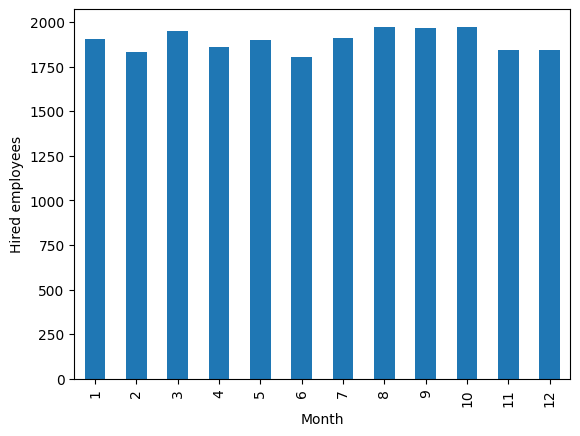

In [19]:
print(f"Min date {data['Date of Joining'].min()}")
print(f"Max date {data['Date of Joining'].max()}")
data_month = data.copy()

data_month["Date of Joining"] = data_month["Date of Joining"].astype("datetime64[ns]")
data_month["Date of Joining"].groupby(data_month['Date of Joining'].dt.month).count().plot(kind='bar', xlabel='Month' , ylabel='Hired employees')

In [21]:
data_2008  = pd.to_datetime(["2008-01-01"]*len(data))

data["Days"] = data["Date of Joining"].astype('datetime64[ns]').sub(data_2008).dt.days
data.Days

,Days
0,273
1,334
2,69
3,307
4,205
...,...
22745,364
22746,18
22747,309
22748,9


In [22]:
numeric_data = data.select_dtypes(include=['number'])
correlation = numeric_data.corr()['Burn Rate']
print(correlation)

Designation             0.737556
Resource Allocation     0.856278
Mental Fatigue Score    0.944546
Burn Rate               1.000000
Days                   -0.001358
Name: Burn Rate, dtype: float64


In [49]:
data.corr(numeric_only=True)['Burn Rate'][:-1]

,Burn Rate
Designation,0.737556
Resource Allocation,0.856278
Mental Fatigue Score,0.944546
Burn Rate,1.000000
Company Type_Service,0.004281
WFH Setup Available_Yes,-0.306266


In [29]:
data.head()

,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,Female,Service,No,2,3.0,3.8,0.16
1,Male,Service,Yes,1,2.0,5.0,0.36
2,Female,Product,Yes,2,NaN,5.8,0.49
3,Male,Service,Yes,1,1.0,2.6,0.20
4,Female,Service,No,3,7.0,6.9,0.52


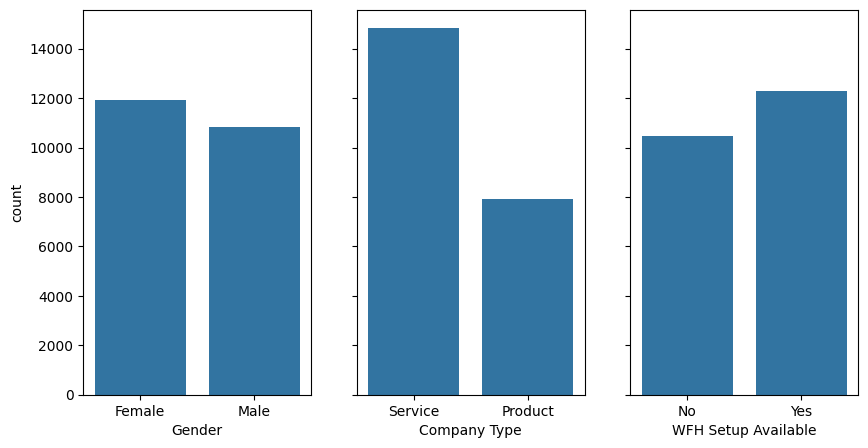

In [30]:
cat_columns = data.select_dtypes(object).columns
fig , ax = plt.subplots(nrows =1, ncols=len(cat_columns), sharey=True, figsize=(10,5))
for i , c in enumerate(cat_columns):
       sns.countplot(x = c , data=data , ax=ax[i])
plt.show()

In [31]:
if all(col in data.columns for col in ['Company Type' , 'WFH Setup Available' , 'Gender']):
    data = pd.get_dummies(data , columns=['Company Type' , 'WFH Setup Available' , 'Gender'], drop_first=True)
    data.head()
    encoded_columns = data.columns
else:
    print("Error : One of more of the specified columns are not present in the DataFrame.")
    print(data.columns)

In [32]:
data

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,Company Type_Service,WFH Setup Available_Yes,Gender_Male
0,2,3.0,3.8,0.16,True,False,False
1,1,2.0,5.0,0.36,True,True,True
2,2,NaN,5.8,0.49,False,True,False
3,1,1.0,2.6,0.20,True,True,True
4,3,7.0,6.9,0.52,True,False,False
...,...,...,...,...,...,...,...
22745,1,3.0,NaN,0.41,True,False,False
22746,3,6.0,6.7,0.59,False,True,False
22747,3,7.0,NaN,0.72,True,True,True
22748,2,5.0,5.9,0.52,True,False,False


In [33]:
# Split data into X and y
y = data['Burn Rate']
X = data.drop('Burn Rate' , axis=1)

In [34]:
# Train-test split
X_train , X_test , y_train , y_test = train_test_split(X , y , train_size=0.7 , shuffle=True , random_state=1)

# Scale X
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train) , index=X_train.index ,  columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test) , index=X_test.index ,  columns=X_test.columns)

In [35]:
X_train

,Designation,Resource Allocation,Mental Fatigue Score,Company Type_Service,WFH Setup Available_Yes,Gender_Male
18275,-0.159082,0.257209,0.300852,-1.368697,0.919924,-0.954561
13833,0.722958,0.257209,0.666504,0.730622,-1.087046,-0.954561
11163,0.722958,0.257209,NaN,0.730622,-1.087046,1.047603
9522,-1.041122,-0.722930,-1.318467,-1.368697,0.919924,-0.954561
15832,0.722958,-0.232861,-0.273745,0.730622,0.919924,-0.954561
...,...,...,...,...,...,...
10955,0.722958,0.257209,NaN,-1.368697,0.919924,1.047603
17289,-0.159082,-0.722930,-0.221509,0.730622,0.919924,1.047603
5192,0.722958,0.257209,0.091907,0.730622,0.919924,-0.954561
12172,0.722958,1.237347,1.920170,0.730622,-1.087046,-0.954561


In [36]:
y_train

,Burn Rate
18275,0.41
13833,0.58
11163,0.56
9522,0.26
15832,0.47
...,...
10955,0.41
17289,0.38
5192,0.45
12172,NaN


In [48]:
# from sklearn.linear_model import LinearRegression

# Create an instance of the LinearRegression class
linear_regression_model = LinearRegression()

# Train the model
linear_regression_model.fit(X_train , y_train)


ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [46]:
# Linear Regression Model Performance Metrics

print("Linear Regression Model Performance Metrics:\n")
# Make predictions on the test set
y_pred = linear_regression_model.predict(X_test)

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# calculate root mean squared error
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)

# calculate mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

# calculate R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared Score:", r2)

Linear Regression Model Performance Metrics:



ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values